# **Final Project DSA 14 White Coders**

Daftar Isi

1. Rumusan Masalah dan Hipotesis
2. Persiapan Data
  *   Load Library
  *   Input Data
3.  EDA


*   Item daftar
*   Item daftar


4.  Data Preprocessing
5.  Pengolahan Data
6.  Kesimpulan






Rumusan Masalah dan Hipotesis

Berdasarkan data bencana yang penulis dapatkan dari Peta Bencana, dapat dilihat bahwa bencana alam yang paling banyak terjadi di Indonesia adalah banjir. Di Provinsi DKI Jakarta saja data banjir yang dilaporkan mencapai 2297 kali dalam 2 tahun. Hal ini menyebabkan DKI Jakarta menjadi daerah dengan kejadian banjir terbanyak di Indonesia dalam 2 tahun terakhir. Provinsi Jawa Barat menyusul di urutan kedua dengan kejadian banjir terbanyak yaitu 690 kali laporan. Hal ini membuat penulis tergerak untuk mengetahui apa penyebab utama dari permasalahan tersebut.

Penulis berasumsi bahwa kejadian banjir tersebut memiliki penyebab utama yaitu curah hujan yang tinggi di kedua daerah yang telah disebutkan (DKI Jakarta dan Jawa Barat). Penulis akan mencari korelasinya dengan data curah hujan di kedua daerah, lalu jika didapatkan bahwa kedua hal tersebut saling terkait maka penulis akan membandingkan hasilnya dengan daerah dengan curah hujan yang sama namun dengan kejadian banjir yang relatif lebih sedikit. Penulis juga akan memberikan rekomendasi cara penanganan banjir untuk mengurangi jumlah kejadian bencana banjir di daerah rawan banjir.

# Persiapan Data

1. Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1_XzRpEDrkEakTj2ry0Z0A6J3v2LH7177/view?usp=sharing
!unzip Datasett.zip

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1_XzRpEDrkEakTj2ry0Z0A6J3v2LH7177 

Archive:  Datasett.zip
replace Dataset/PetaBencana_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

2. Input Data

**Data Bencana**
#####data utama dari Peta Bencana

In [ ]:
df = pd.read_csv('Dataset/PetaBencana_Dataset.csv')
df.head()

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,95061,01/01/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,95062,01/01/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,95063,01/01/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,95064,01/01/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


**Curah hujan di Kemayoran**
#####data curah hujan yang terjadi di daerah kemayoran mewakili DKI Jakarta

In [ ]:
kemayoran = pd.read_excel("Dataset/Curah Hujan di Stasiun Kemayoran Menurut Bulan.xlsx")
kemayoran.head()

,Bulan,2019,2020,2021
0,Januari,383.9,618.0,332.8
1,Februari,270.1,1043.2,604.4
2,Maret,327.3,220.7,244.1
3,April,194.6,182.8,213.9
4,Mei,47.8,50.4,203.6


**Curah hujan di Tanjung Priok**
#####data curah hujan di daerah Tanjung Priok mewakili DKI Jakarta

In [ ]:
tanjung = pd.read_excel("Dataset/Curah Hujan di Stasiun Tanjung Priuk Menurut Bulan.xlsx")
tanjung.head()

,Bulan,2019,2020,2021
0,Januari,365.5,607.2,332.4
1,Februari,216.9,784.5,466.8
2,Maret,332.1,211.1,190.1
3,April,132.5,142.2,88.6
4,Mei,24.7,52.5,249.7


**Curah hujan di Jawa Barat**
#####data curah hujan di Jawa Barat

In [ ]:
jabar = pd.read_excel("Dataset/Curah Hujan di Jawa Barat.xlsx")
jabar.head()

,id,kode_provinsi,nama_provinsi,nama_pos_hujan,nama_stasiun_hujan,bulan,jumlah_curah_hujan,satuan,tahun
0,1,32,JAWA BARAT,CILIWUNG-CISADANE,CIHIDEUNG,JANUARI,45.0,MILIMETER,2015
1,2,32,JAWA BARAT,CILIWUNG-CISADANE,CIHIDEUNG,FEBRUARI,63.0,MILIMETER,2015
2,3,32,JAWA BARAT,CILIWUNG-CISADANE,CIHIDEUNG,MARET,62.0,MILIMETER,2015
3,4,32,JAWA BARAT,CILIWUNG-CISADANE,CIHIDEUNG,APRIL,25.0,MILIMETER,2015
4,5,32,JAWA BARAT,CILIWUNG-CISADANE,CIHIDEUNG,MEI,58.0,MILIMETER,2015


**Banjir di Singapura**
#####data banjir di Negara Singapura


In [ ]:
banjir_singapore = pd.read_excel('Dataset/Banjir Singapore.xlsx')
banjir_singapore.tail()

,Bulan,Banjir
19,Agustus,5
20,September,2
21,Oktober,0
22,November,0
23,Desember,0


**Curah hujan di Singapura**
#####data curah hujan di Negara Singapura sebagai pembanding

In [ ]:
singapore = pd.read_excel('Dataset/Curah Hujan di Singapura.xlsx')
singapore.head()

,Bulan,2020,2021
0,Januari,90,475
1,Februari,65,40
2,Maret,110,285
3,April,185,352
4,Mei,255,250


**Ruang Terbuka Hijau Nasional**

In [ ]:
RTH = pd.read_excel('Dataset/Data_RTH_SIPSN_KLHK_2021.xlsx')
RTH.head()

,SIPSN - Sistem Informasi Pengelolaan Sampah Nasional,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,Tahun,Provinsi,Kabupaten/Kota,Luas Wilayah (km2)(A),Luas RTH (km2)(B),% RTH(B/A),Taman Kota (km2),Hutan Kota (km2),Jalur hijau di Jalan (km2),Sempadan Sungai (km2),Sempadan Pantai (km2),Tempat Pemakaman Umum (km2),Sempadan Rel Kereta Api (km2),Jalur Hijau Jaringan Listrik Tegangan Tinggi (...,Pengaman Sumber_Air Baku Mata Air (km2),Kebun Bibit (km2),Lain-lain (km2)
1,NaN,2021,Aceh,Kab. Aceh Selatan,4173.82,NaN,NaN,-,-,-,-,-,-,-,-,-,-,-
2,NaN,2021,Aceh,Kab. Aceh Timur,6040.6,0.0757,0.0,0.05,0.03,-,-,-,-,-,-,-,-,-
3,NaN,2021,Aceh,Kab. Aceh Tengah,4527.53,1.11217,0.02,0.32,0.02,0.02,0.6,0.15,0.01,-,-,-,-,-
4,NaN,2021,Aceh,Kab. Aceh Barat,2927.95,0.02902,0.0,0.01,0.01,0.0,0.0,0.0,0.0,-,-,-,-,-


Struktur Data

In [ ]:
df.info()
kemayoran.info()
tanjung.info()
jabar.info()
singapore.info()
RTH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pkey           4235 non-null   int64  
 1   date           4235 non-null   object 
 2   time           4235 non-null   object 
 3   source         4235 non-null   object 
 4   status         4235 non-null   object 
 5   url            3570 non-null   object 
 6   image_url      3334 non-null   object 
 7   disaster_type  4235 non-null   object 
 8   report_dat     3455 non-null   object 
 9   tags           4235 non-null   object 
 10  title          188 non-null    object 
 11  text           3830 non-null   object 
 12  ID_Desa        4227 non-null   float64
 13  ID_Kec         4227 non-null   float64
 14  ID_Kab         4227 non-null   float64
 15  ID_Prov        4227 non-null   float64
 16  Desa           4227 non-null   object 
 17  Kecamatan      4227 non-null   object 
 18  Kabupate

dari seluruh data yang penulis gunakan, tidak terdapat missing values sehingga tidak perlu menghilangkan seluruh atau sebagian data dan hasil yang didapatkan seharusnya akan lebih akurat.

# EDA


Tabel Deskriptif

In [ ]:
df.describe()

,pkey,ID_Desa,ID_Kec,ID_Kab,ID_Prov,long,lat
count,4235.000000,4.227000e+03,4.227000e+03,4227.000000,4227.000000,4235.000000,4235.000000
mean,183639.100590,3.561485e+09,3.561485e+06,3561.424651,35.025787,108.271799,-5.810972
std,74804.128634,1.090398e+09,1.090398e+06,1090.399979,11.009528,4.222665,2.137486
min,94941.000000,1.103030e+09,1.103030e+06,1103.000000,11.000000,2.351460,-10.205170
25%,108712.500000,3.172090e+09,3.172090e+06,3172.000000,31.000000,106.810090,-6.280165
50%,190452.000000,3.175020e+09,3.175020e+06,3175.000000,31.000000,106.884960,-6.207370
75%,257896.500000,3.307570e+09,3.307570e+06,3307.500000,33.000000,107.164205,-6.158490
max,299728.000000,9.420020e+09,9.420020e+06,9420.000000,94.000000,140.664020,48.856696


In [ ]:
kemayoran.describe()

,2020,2021
count,12.000000,12.000000
mean,235.958333,199.550000
std,299.963514,151.460655
min,12.100000,35.800000
25%,78.075000,104.975000
50%,143.300000,176.850000
75%,211.400000,221.450000
max,1043.200000,604.400000


In [ ]:
tanjung.describe()

,2020,2021
count,12.000000,12.000000
mean,218.325000,176.358333
std,232.743312,128.761742
min,52.500000,47.000000
25%,93.200000,78.950000
50%,123.250000,146.750000
75%,217.450000,247.825000
max,784.500000,466.800000


In [ ]:
jabar.describe()

,jumlah_curah_hujan,tahun
count,288.000000,288.000000
mean,56.373264,2017.500000
std,30.604202,1.710798
min,0.000000,2015.000000
25%,37.000000,2016.000000
50%,54.000000,2017.500000
75%,72.000000,2019.000000
max,252.500000,2020.000000


In [ ]:
singapore.describe()

,2020,2021
count,12.000000,12.000000
mean,160.000000,263.083333
std,71.858447,116.414197
min,65.000000,40.000000
25%,101.250000,206.250000
50%,147.500000,260.000000
75%,228.750000,301.750000
max,265.000000,475.000000


In [ ]:
RTH[['Unnamed: 1','Unnamed: 2','Unnamed: 5','Unnamed: 6']]

,Unnamed: 1,Unnamed: 2,Unnamed: 5,Unnamed: 6
0,Tahun,Provinsi,Luas RTH (km2)(B),% RTH(B/A)
1,2021,Aceh,NaN,NaN
2,2021,Aceh,0.0757,0.0
3,2021,Aceh,1.11217,0.02
4,2021,Aceh,0.02902,0.0
...,...,...,...,...
337,2021,Papua,0.04885,0.01
338,2021,Papua Barat,NaN,NaN
339,2021,Papua Barat,NaN,NaN
340,2021,Papua Barat,0.00025,0.0


Plot Distribusi Bencana

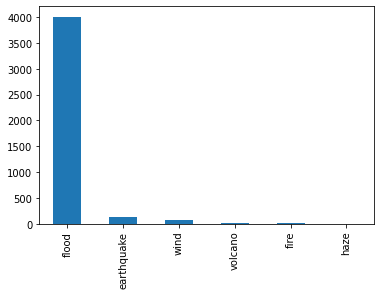

In [ ]:
df['disaster_type'].value_counts().plot.bar()

dapat dilihat dari data diatas bahwa bencana banjir dilaporkan paling banyak di Indonesia dalam 2 tahun terakhir yaitu mencapai 4008 laporan

# Data Preprocessing


Pada tahap ini penulis akan memfilter data agar didapatkan data banjir dan curah hujan di Daerah DKI Jakarta dan Jawa Barat untuk dibandingkan kemudian

In [ ]:
banjir = df[df['disaster_type']=='flood']
banjir = banjir[['date','disaster_type','Provinsi']]

In [ ]:
banjir["date"] =  banjir["date"].astype('datetime64[ns]')

In [ ]:
banjir_provinsi = banjir.groupby('Provinsi').count()
banjir_provinsi['disaster_type']

Provinsi
Aceh                               20
Bali                                9
Banten                            211
Bengkulu                            3
Daerah Istimewa Yogyakarta         11
Daerah Khusus Ibukota Jakarta    2297
Gorontalo                           6
Jambi                               1
Jawa Barat                        690
Jawa Tengah                       141
Jawa Timur                        155
Kalimantan Barat                   40
Kalimantan Selatan                162
Kalimantan Tengah                  22
Kalimantan Timur                   70
Kalimantan Utara                    4
Kepulauan Bangka Belitung           3
Kepulauan Riau                      2
Lampung                             8
Maluku                              1
Maluku Utara                        1
Nusa Tenggara Barat                13
Nusa Tenggara Timur                13
Papua                               7
Papua Barat                         3
Riau                               10
Sul

In [ ]:
banjir_jakarta = banjir[banjir["Provinsi"]=='Daerah Khusus Ibukota Jakarta']
# banjir_jakarta.head()

,date,disaster_type,Provinsi
0,2020-01-01,flood,Daerah Khusus Ibukota Jakarta
2,2020-01-01,flood,Daerah Khusus Ibukota Jakarta
4,2020-01-01,flood,Daerah Khusus Ibukota Jakarta
5,2020-01-01,flood,Daerah Khusus Ibukota Jakarta
7,2020-01-01,flood,Daerah Khusus Ibukota Jakarta


data banjir di jakarta di groupby tiap bulan pada tahun 2020 dan 2021 

In [ ]:
banjir_perbulan_jakarta = banjir_jakarta.groupby(pd.Grouper(key='date', axis=0, freq='M')).count()
banjir_perbulan_jakarta['disaster_type']

date
2020-01-31     149
2020-02-29    1121
2020-03-31      60
2020-04-30      57
2020-05-31      19
2020-06-30      29
2020-07-31      62
2020-08-31      81
2020-09-30      59
2020-10-31      53
2020-11-30      13
2020-12-31      11
2021-01-31      19
2021-02-28     367
2021-03-31      14
2021-04-30      14
2021-05-31      27
2021-06-30      19
2021-07-31      46
2021-08-31      36
2021-09-30      16
2021-10-31      10
2021-11-30       3
2021-12-31      12
Freq: M, Name: disaster_type, dtype: int64

In [ ]:
banjir_perbulan_2020 = banjir_perbulan_jakarta.iloc[:12,:]
banjir_perbulan_2020 = banjir_perbulan_2020[['disaster_type']]
# banjir_perbulan_2020.tail()

In [ ]:
banjir_perbulan_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   disaster_type  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [ ]:
banjir_perbulan_2021 = banjir_perbulan_jakarta.iloc[12:,:]
banjir_perbulan_2021 = banjir_perbulan_2021[['disaster_type']]
# banjir_perbulan_2021.info()

In [ ]:
bulan = ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']
banjir_perbulan_2020["Bulan"] = bulan
banjir_perbulan_2021["Bulan"] = bulan

In [ ]:
banjir_perbulan_jakarta_new = pd.merge(banjir_perbulan_2020, banjir_perbulan_2021, on=['Bulan'], how='outer')
banjir_perbulan_jakarta_new.rename(columns = {'disaster_type_x':'banjir 2020', 'disaster_type_y':'banjir 2021'}, inplace = True)
banjir_perbulan_jakarta_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   banjir 2020  12 non-null     int64 
 1   Bulan        12 non-null     object
 2   banjir 2021  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


In [ ]:
del kemayoran[2019]
del tanjung[2019]

In [ ]:
hujanJKT = pd.merge(kemayoran, tanjung, on=['Bulan'], how='outer')
hujanJKT.rename(columns = {'2020_x':'CH kemayoran 2020', '2021_x':'CH kemayoran 2021','2020_y':'CH tanjung 2020','2021_y':'CH tanjung 2021'}, inplace = True)
hujanJKT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bulan              12 non-null     object 
 1   CH kemayoran 2020  12 non-null     float64
 2   CH kemayoran 2021  12 non-null     float64
 3   CH tanjung 2020    12 non-null     float64
 4   CH tanjung 2021    12 non-null     float64
dtypes: float64(4), object(1)
memory usage: 576.0+ bytes


In [ ]:
RTH_Jakarta_Jabar = RTH.loc(RTH[])

#Pengolahan Data
#####pada tahap ini data yang telah di proses sebelumnya akan diolah untuk mendapatkan insight

Korelasi

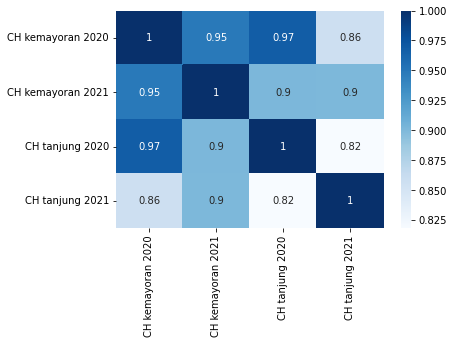

In [ ]:
cor = hujanJKT.corr()
sns.heatmap(cor, cmap="Blues", annot=True)
# cor.style.background_gradient(cmap='Blues')

In [ ]:
banjir_hujan = pd.merge(banjir_perbulan_jakarta_new, hujanJKT, on=['Bulan'], how='outer')
# banjir_hujan.info()

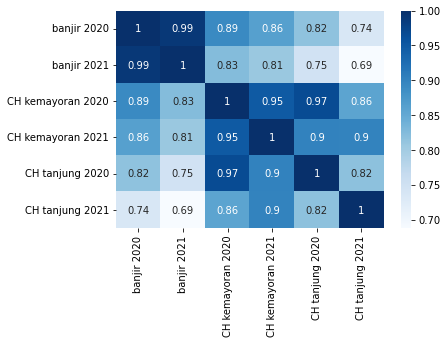

In [ ]:
corr = banjir_hujan.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
# corr.style.background_gradient(cmap='Blues')

dari visualisasi diatas dapat dilihat bahwa banjir yang terjadi di DKI Jakarta berkorelasi positif dengan curah hujan yang terjadi di daerah itu pula. Artinya curah hujan di DKI Jakarta merupakan penyebab terjadinya banjir

In [ ]:
banjir_jabar = banjir[banjir["Provinsi"]=='Jawa Barat']
# banjir_jabar.head()

In [ ]:
banjir_perbulan_jabar = banjir_jabar.groupby(pd.Grouper(key='date', axis=0, freq='M')).count()
banjir_perbulan_jabar['disaster_type']

date
2020-01-31     39
2020-02-29    285
2020-03-31     36
2020-04-30     16
2020-05-31     16
2020-06-30      6
2020-07-31     14
2020-08-31     15
2020-09-30      6
2020-10-31     14
2020-11-30      3
2020-12-31      6
2021-01-31     11
2021-02-28    144
2021-03-31      6
2021-04-30      3
2021-05-31      5
2021-06-30      6
2021-07-31     10
2021-08-31     19
2021-09-30     12
2021-10-31      8
2021-11-30      4
2021-12-31      6
Freq: M, Name: disaster_type, dtype: int64

In [ ]:
banjir_perbulan_2020_jabar = banjir_perbulan_jabar.iloc[:12,:]
banjir_perbulan_2020_jabar = banjir_perbulan_2020[['disaster_type']]
# banjir_perbulan_2020_jabar.tail()

In [ ]:
banjir_perbulan_2021_jabar = banjir_perbulan_jabar.iloc[12:,:]
banjir_perbulan_2021_jabar = banjir_perbulan_2020[['disaster_type']]
# banjir_perbulan_2021_jabar.head()

In [ ]:
banjir_perbulan_2020_jabar["Bulan"] = bulan
banjir_perbulan_2021_jabar["Bulan"] = bulan

In [ ]:
banjir_perbulan_jabar_new = pd.merge(banjir_perbulan_2020_jabar, banjir_perbulan_2021_jabar, on=['Bulan'], how='outer')
# banjir_perbulan_jabar_new.info()

In [ ]:
banjir_perbulan_jabar_new.rename(columns = {'disaster_type_x':'banjir 2020 jabar', 'disaster_type_y':'banjir 2021 jabar'}, inplace = True)

In [ ]:
jabar = jabar.dropna()
jabar = jabar[['jumlah_curah_hujan','bulan','nama_provinsi','tahun']]
# jabar[:20]

In [ ]:
jabar_2020 = jabar.loc[jabar['tahun']>=2020]
jabar_2020_perbulan = jabar_2020.groupby('bulan').sum()
jabar_2020_perbulan['jumlah_curah_hujan']

bulan
AGUSTUS      162.0
APRIL        163.0
DESEMBER     210.0
FEBRUARI     318.0
JANUARI      311.0
JULI         123.5
JUNI         115.0
MARET        240.0
MEI          226.0
NOVEMBER     293.5
OKTOBER      391.5
SEPTEMBER    199.0
Name: jumlah_curah_hujan, dtype: float64

In [ ]:
bulan_acs = ['Agustus', 'April', 'Desember', 'Februari', 'Januari', 'Juli', 'Juni', 'Maret', 'Mei', 'November', 'Oktober', 'September']
jabar_2020_perbulan["Bulan"] = bulan_acs

In [ ]:
banjir_jabar_new = pd.merge(banjir_perbulan_jabar_new, jabar_2020_perbulan, on=['Bulan'], how='outer')
# banjir_jabar_new

In [ ]:
del banjir_jabar_new["tahun"]

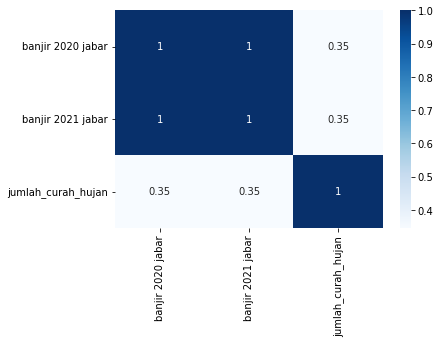

In [ ]:
kore = banjir_jabar_new.corr()
sns.heatmap(kore, cmap="Blues", annot=True)

sementara di daerah Jawa Barat curah hujan tidak terlalu mempengaruhi kejadian banjir karena dari visualisasi di atas terlihat korelasinya kecil

In [ ]:
banjir_perbulan_singapore_2020 = banjir_singapore.iloc[:12,:]
# banjir_perbulan_singapore_2020.tail()

In [ ]:
banjir_perbulan_singapore_2021 = banjir_singapore.iloc[12:,:]
# banjir_perbulan_singapore_2021.head()

In [ ]:
banjir_singapore_new = pd.merge(banjir_perbulan_singapore_2020, banjir_perbulan_singapore_2021, on=['Bulan'], how='outer')
# banjir_singapore_new

In [ ]:
hujan_singapore = pd.merge(singapore, banjir_singapore_new, on=['Bulan'], how='outer')
hujan_singapore.head()

,Bulan,2020,2021,Banjir_x,Banjir_y
0,Januari,90,475,0,0
1,Februari,65,40,0,0
2,Maret,110,285,0,2
3,April,185,352,4,0
4,Mei,255,250,2,0


In [ ]:
hujan_singapore.rename(columns = {2020:'CH singapore 2020', 2021:'CH singapore 2021','Banjir_x':'Banjir Singapore 2020','Banjir_y':'Banjir Singapore 2021'}, inplace = True)
# del hujan_singapore['Unnamed: 3']


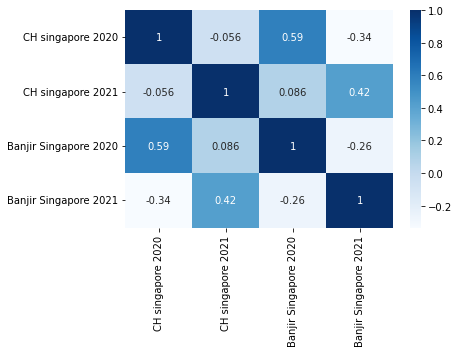

In [ ]:
korelasi = hujan_singapore.corr()
sns.heatmap(korelasi, cmap="Blues", annot=True)

untuk di Negara Singapore juga mirip dengan Jawa Barat bahwa curah hujan tidak terlalu mempengaruhi bencana banjir dapat dilihat dari nilai korelasinya yang kecil

# Kesimpulan

Setelah dilakukan perbandingan data dari curah hujan dan kejadian banjir di daerah DKI Jakarta dan Jawa Barat dapat diambil kesimpulan yang pertama curah hujan yang tinggi di DKI Jakarta sangat mempengaruhi kejadian banjir di daerah tersebut. Artinya semakin tinggi curah hujan di DKI Jakarta maka semakin tinggi pula jumlah kejadian banjirnya. 

sementara di wilayah Jawa Barat, curah hujan tidak mempengaruhi kejadian banjir di daerah tersebut. 